#Kmeans

##Uploading file
The file that is uploaded is used_cars_proccessed.csv. It's used cars data but has been going through preprocessing steps so it's ready to use.

In [0]:
from google.colab import files
datafile = files.upload()

##Convert data into dataframe

In [5]:
import pandas as pd

df = pd.read_csv('used_cars_processed.csv',engine="python")
pd.set_option('display.max_columns', None)
df= df.loc[:, df.columns != 'Unnamed: 0'] #dropping index column
df

,region,price,year,manufacturer,model,fuel,title_status,transmission,drive,type,state
0,12,17899.0,2012.0,37,1891,2,0,1,0,4,0
1,12,8795.0,2016.0,11,1525,2,0,0,0,9,0
2,12,8795.0,2016.0,11,1525,2,0,0,0,9,0
3,12,13999.0,2009.0,31,1525,2,0,0,0,8,0
4,12,14500.0,2007.0,12,2876,2,0,0,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...
18129,5,2200.0,2005.0,28,2340,2,0,0,0,0,3
18130,5,24999.0,2017.0,34,3512,2,0,1,0,9,3
18131,5,12127.0,2018.0,28,2836,2,0,0,1,9,3
18132,5,8795.0,2019.0,18,1917,2,0,0,0,0,3


##Taking feature
The features taken are model and price since the amount of elements are evenly distributed and there's also many value "type". This is done to make image plotting abstract and not forming lines.

In [6]:
df = df[['model','price']]
df
# from collections import Counter
# len(Counter(df['model'])) #return 3564 value 'types'

,model,price
0,1891,17899.0
1,1525,8795.0
2,1525,8795.0
3,1525,13999.0
4,2876,14500.0
...,...,...
18129,2340,2200.0
18130,3512,24999.0
18131,2836,12127.0
18132,1917,8795.0


##Euclidean Distance formula
How to use: For example, we want to calculate distance between point (x1,y1) and (x2,y2) where x is price, and y is state.
the formula is:![alt text](https://pemrogramanmatlab.files.wordpress.com/2017/07/rumus-jarak-euclidean.png)

In [0]:
import numpy as np

def euclidean(x:float,y:float):
  total = 0
  for i in range(0,len(x)):
    total = total + (x[i]-y[i])**2
  return np.sqrt(total)

Testing euclidean distance formula

In [8]:
euclidean([0,1],[0,3])

2.0

##Setting Number of Cluster

In [0]:
k = 4

##Initializing Centroids, at random points
The points are randomized with range from 1 to 0.
It's because I will initialize "old clusters" as all zero. The while condition needs to be satisfied, which is distance must be greater than zero. So I randomized with that range to avoid getting initial cluster point(0,0) which resulting in getting 0 as distance.

In [10]:
centroids = [[np.random.randint(max(df['model'])),np.random.randint(max(df['price']))] for i in range(k)]
print("Initial Centroids: ",centroids)

Initial Centroids:  [[1478, 16551], [3557, 16240], [883, 27026], [3581, 11918]]


##Initializing cluster list, and their centroids

In [0]:
clusters = [[] for i in range(0,k)]
old_centroids = [[0,0] for i in range(k)]
dist_old_new_centroid = []

##Calculating distance between "old" and new value

In [12]:
for i in range(0,k):
  dist_old_new_centroid.append(euclidean(old_centroids[i],centroids[i]))
print("Distance between old and new centroid: ", dist_old_new_centroid)

Distance between old and new centroid:  [16616.861466594706, 16624.976661637753, 27040.420947167226, 12444.36760144926]


##Setting points (for plotting) which we get from dataset

In [13]:
points = []
for i in range(0,len(df['price'])):
  points.append([df['model'][i],df['price'][i]])
print("Points available: ",points)
print("Initial Clusters: ", clusters)

Points available:  [[1891, 17899.0], [1525, 8795.0], [1525, 8795.0], [1525, 13999.0], [2876, 14500.0], [1551, 12500.0], [3607, 16500.0], [3375, 14500.0], [2876, 27999.0], [1525, 14999.0], [127, 24999.0], [2934, 8999.0], [2746, 5999.0], [2876, 13500.0], [1452, 9500.0], [974, 4600.0], [259, 26950.0], [3077, 8300.0], [2720, 27476.0], [1411, 23500.0], [1899, 15475.0], [1335, 15475.0], [2428, 3995.0], [974, 21475.0], [1317, 14476.0], [1931, 23295.0], [1575, 8795.0], [1724, 8795.0], [2354, 28248.0], [3468, 23800.0], [1692, 28000.0], [14, 15995.0], [2404, 10550.0], [1016, 18999.0], [165, 18999.0], [2354, 2500.0], [1525, 22995.0], [14, 28895.0], [1025, 29999.0], [1943, 14795.0], [190, 8950.0], [3194, 16500.0], [1236, 24700.0], [292, 14900.0], [666, 12495.0], [1724, 6495.0], [3471, 19499.0], [1129, 8795.0], [3156, 13976.0], [2461, 5495.0], [745, 8499.0], [3010, 21999.0], [1363, 8795.0], [2836, 7495.0], [693, 26950.0], [3338, 6995.0], [1079, 7995.0], [915, 2250.0], [3358, 2800.0], [1791, 5495.0]

##Showing initial graph before clustering begins

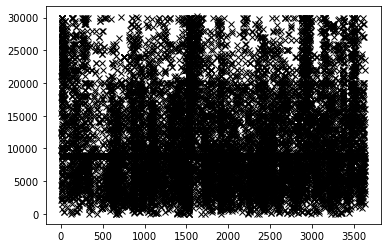

In [14]:
import matplotlib.pyplot as plt
for point in points:
  plt.plot(point[0], point[1], marker='x',c='k')
plt.show()

##Clustering Time!

In [0]:
distances = []
dist_centroid_point = []
y_pred = [0 for i in range(0,len(df['price']))]
      
while all(dist > 0 for dist in dist_old_new_centroid):
  for i in range(len(points)):
    for j in range(len(centroids)):
      distances.append(euclidean(points[i],centroids[j]))
    min_distance = np.argmin(distances)
    clusters[min_distance].append(points[i])
    y_pred[i] = min_distance
    min_distance = None
    distances.clear()
  for centroid in centroids:
    j=0
    if dist_old_new_centroid[j]>0:
      for l in range(0,len(clusters[j])):
        dist_centroid_point.append(euclidean(centroid,clusters[j][l]))
      new_centroid = [np.mean(dist_centroid_point),np.mean(dist_centroid_point)]
      centroid = new_centroid
      dist_old_new_centroid[j] = euclidean(centroid,new_centroid)
      dist_centroid_point.clear()
    j+=1

##Printing clusters

In [16]:
print("Clusters now: ")
for i in range(0,k):
  print("Cluster ",i,":",clusters[i])
print("y_pred : ", y_pred)

Clusters now: 
Cluster  0 : [[1891, 17899.0], [1525, 13999.0], [1525, 14999.0], [1899, 15475.0], [1335, 15475.0], [974, 21475.0], [1317, 14476.0], [14, 15995.0], [1016, 18999.0], [165, 18999.0], [1943, 14795.0], [292, 14900.0], [1088, 16476.0], [1382, 14800.0], [809, 16999.0], [1035, 16999.0], [352, 14999.0], [1937, 14995.0], [1099, 16975.0], [2877, 21500.0], [820, 17500.0], [1504, 20495.0], [292, 21000.0], [724, 18795.0], [1620, 17595.0], [856, 19495.0], [2902, 21500.0], [1716, 16695.0], [41, 17495.0], [974, 20495.0], [1699, 15495.0], [2403, 17495.0], [1908, 14495.0], [614, 18795.0], [666, 13795.0], [2257, 20945.0], [1069, 14255.0], [151, 14255.0], [666, 15350.0], [1651, 18995.0], [1988, 18995.0], [920, 18795.0], [707, 17495.0], [1840, 14900.0], [127, 14255.0], [1179, 20495.0], [1099, 19795.0], [41, 17395.0], [2428, 20995.0], [2122, 16500.0], [1683, 16000.0], [570, 15695.0], [2428, 20995.0], [933, 19900.0], [1088, 13900.0], [348, 19900.0], [1325, 17900.0], [856, 19495.0], [1716, 16695

##Plotting to see resulting images (This will take around 10 minutes)

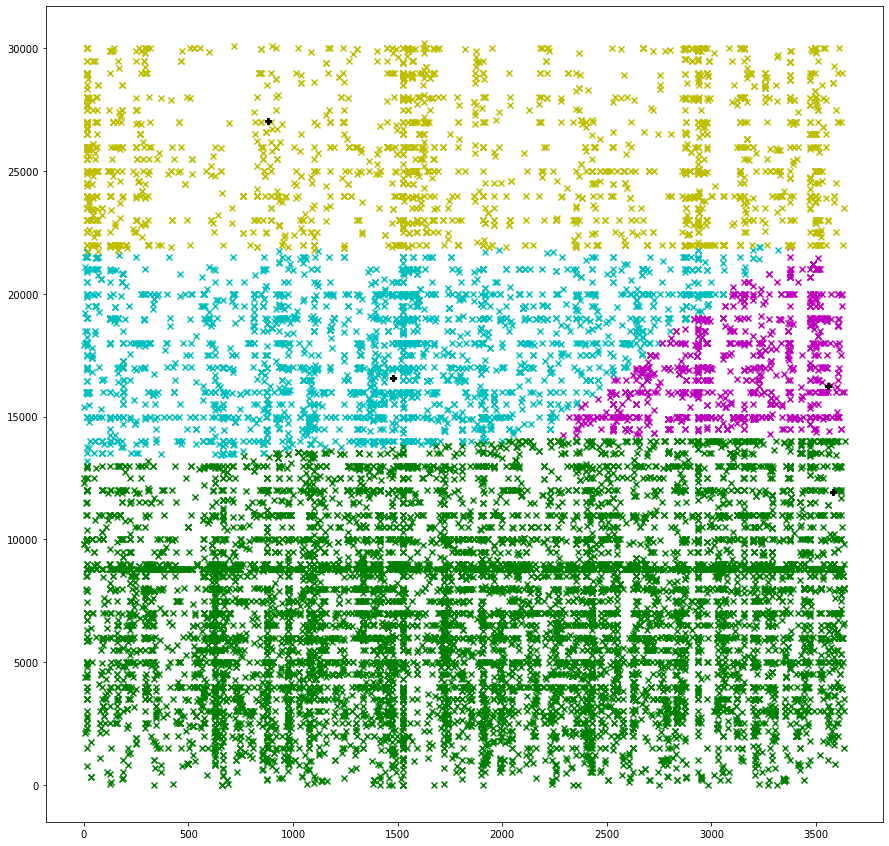

In [19]:
fig, ax = plt.subplots(figsize=(15,15))
colors = ['c','m','y','g','r']
i = 0
for cluster in clusters:  
  for point in cluster:
    ax.scatter(point[0],point[1], marker = 'x', c=colors[i])
  i+=1
i=0
for centroid in centroids:
  ax.scatter(centroid[0], centroid[1],marker='P',c='black')
  i+=1
# plt.legend()
plt.show()

In [21]:
model = df['model'].values
price = df['price'].values
data_and_clusters = pd.DataFrame(zip(model,price,y_pred),columns=['model','price','cluster'])
data_and_clusters

,model,price,cluster
0,1891,17899.0,0
1,1525,8795.0,3
2,1525,8795.0,3
3,1525,13999.0,0
4,2876,14500.0,1
...,...,...,...
18129,2340,2200.0,3
18130,3512,24999.0,2
18131,2836,12127.0,3
18132,1917,8795.0,3


##Evaluation: using elbow method

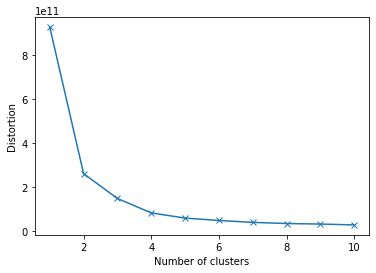

In [22]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random').fit(df)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='x')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
# plt.show()

#Kmeans: with Log Transformation

##Uploading file
The file that is uploaded is used_cars_proccessed.csv. It's used cars data but has been going through preprocessing steps so it's ready to use.

In [0]:
from google.colab import files
datafile = files.upload()

##Convert data into dataframe

In [25]:
import pandas as pd

df = pd.read_csv('used_cars_processed.csv',engine="python")
pd.set_option('display.max_columns', None)
df= df.loc[:, df.columns != 'Unnamed: 0'] #dropping index column
df

,region,price,year,manufacturer,model,fuel,title_status,transmission,drive,type,state
0,12,17899.0,2012.0,37,1891,2,0,1,0,4,0
1,12,8795.0,2016.0,11,1525,2,0,0,0,9,0
2,12,8795.0,2016.0,11,1525,2,0,0,0,9,0
3,12,13999.0,2009.0,31,1525,2,0,0,0,8,0
4,12,14500.0,2007.0,12,2876,2,0,0,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...
18129,5,2200.0,2005.0,28,2340,2,0,0,0,0,3
18130,5,24999.0,2017.0,34,3512,2,0,1,0,9,3
18131,5,12127.0,2018.0,28,2836,2,0,0,1,9,3
18132,5,8795.0,2019.0,18,1917,2,0,0,0,0,3


##Taking feature
The features taken are model and price since the amount of elements are evenly distributed and there's also many value "type". This is done to make image plotting abstract and not forming lines.

In [26]:
df = df[['model','price']]
df
# from collections import Counter
# len(Counter(df['model'])) #return 3564 value 'types'

,model,price
0,1891,17899.0
1,1525,8795.0
2,1525,8795.0
3,1525,13999.0
4,2876,14500.0
...,...,...
18129,2340,2200.0
18130,3512,24999.0
18131,2836,12127.0
18132,1917,8795.0


##Log Transformation

In [27]:
import numpy as np

df['model'] = np.log(df['model']+1)
df['price'] = np.log(df['price']+1)
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,model,price
0,7.545390,9.792556
1,7.330405,9.082052
2,7.330405,9.082052
3,7.330405,9.546813
4,7.964503,9.581973
...,...,...
18129,7.758333,7.696667
18130,8.164226,10.126631
18131,7.950502,9.403272
18132,7.559038,9.082052


##Euclidean Distance formula
How to use: For example, we want to calculate distance between point (x1,y1) and (x2,y2) where x is price, and y is state.
the formula is:![alt text](https://pemrogramanmatlab.files.wordpress.com/2017/07/rumus-jarak-euclidean.png)

In [0]:
import numpy as np

def euclidean(x:float,y:float):
  total = 0
  for i in range(0,len(x)):
    total = total + (x[i]-y[i])**2
  return np.sqrt(total)

Testing euclidean distance formula

In [29]:
euclidean([0,1],[0,3])

2.0

##Setting Number of Cluster

In [0]:
k = 4

##Initializing Centroids, at random points
The points are randomized with range from 1 to 0.
It's because I will initialize "old clusters" as all zero. The while condition needs to be satisfied, which is distance must be greater than zero. So I randomized with that range to avoid getting initial cluster point(0,0) which resulting in getting 0 as distance.

In [31]:
centroids = [[np.random.randint(max(df['model'])),np.random.randint(max(df['price']))] for i in range(k)]
print("Initial Centroids: ",centroids)

Initial Centroids:  [[7, 0], [0, 2], [1, 6], [3, 0]]


##Initializing cluster list, and their centroids

In [0]:
clusters = [[] for i in range(0,k)]
old_centroids = [[0,0] for i in range(k)]
dist_old_new_centroid = []
point_and_cluster = {}

##Calculating distance between "old" and new value

In [33]:
for i in range(0,k):
  dist_old_new_centroid.append(euclidean(old_centroids[i],centroids[i]))
print("Distance between old and new centroid: ", dist_old_new_centroid)

Distance between old and new centroid:  [7.0, 2.0, 6.082762530298219, 3.0]


##Setting points (for plotting) which we get from dataset

In [34]:
points = []
for i in range(0,len(df['price'])):
  points.append([df['model'][i],df['price'][i]])
print("Points available: ",points)
print("Initial Clusters: ", clusters)

Points available:  [[7.545389749611823, 9.792555991828847], [7.330405211844402, 9.082052351674651], [7.330405211844402, 9.082052351674651], [7.330405211844402, 9.546812608597396], [7.964503363551548, 9.581972891547895], [7.347299700743164, 9.433563920090563], [8.190908881182514, 9.711176264112805], [8.124446855715847, 9.581972891547895], [7.964503363551548, 10.239959789157341], [7.330405211844402, 9.615805480084347], [4.852030263919617, 10.126631103850338], [7.984462732262196, 9.104979856318357], [7.918264686095274, 8.699514748210191], [7.964503363551548, 9.510519035757246], [7.2813856635702825, 9.15915233520675], [6.882437470997847, 8.434028950155469], [5.560681631015528, 10.201775681400134], [8.032035314398824, 9.024131268455035], [7.908754738783246, 10.221104570071097], [7.252762418053187, 10.064798252418377], [7.549609165154532, 9.647045715820404], [7.197435354096591, 9.647045715820404], [7.795234929002173, 8.293049139768444], [6.882437470997847, 9.97469131154246], [7.1838707150624

##Showing initial graph before clustering begins

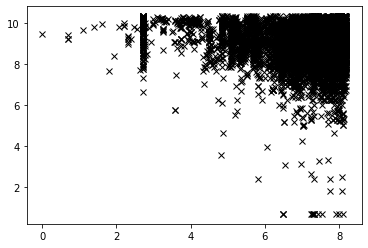

In [35]:
import matplotlib.pyplot as plt
for point in points:
  plt.plot(point[0], point[1], marker='x',c='k')
plt.show()

##Clustering Time!

In [0]:
distances = []
dist_centroid_point = []
y_pred = [0 for i in range(0,len(df['price']))]
      
while all(dist > 0 for dist in dist_old_new_centroid):
  for i in range(len(points)):
    for j in range(len(centroids)):
      distances.append(euclidean(points[i],centroids[j]))
    min_distance = np.argmin(distances)
    clusters[min_distance].append(points[i])
    y_pred[i] = min_distance
    min_distance = None
    distances.clear()
  for centroid in centroids:
    j=0
    if dist_old_new_centroid[j]>0:
      for l in range(0,len(clusters[j])):
        dist_centroid_point.append(euclidean(centroid,clusters[j][l]))
      new_centroid = [np.mean(dist_centroid_point),np.mean(dist_centroid_point)]
      centroid = new_centroid
      dist_old_new_centroid[j] = euclidean(centroid,new_centroid)
      dist_centroid_point.clear()
    j+=1

##Printing clusters

In [37]:
print("Clusters now: ")
for i in range(0,k):
  print("Cluster ",i,":",clusters[i])
print("y_pred : ", y_pred)

Clusters now: 
Cluster  0 : [[7.284820912568604, 0.6931471805599453], [7.853604813097837, 5.993961427306569], [7.6255950721324535, 6.2166061010848646], [7.257707677160043, 5.860786223465865], [7.742835955430749, 6.214608098422191], [8.053251153549096, 6.90875477931522], [7.795234929002173, 6.2166061010848646], [7.927685045615778, 6.90875477931522], [7.452402451223638, 3.258096538021482], [8.07961802938984, 2.4849066497880004], [7.9229859587111955, 6.90875477931522], [7.257707677160043, 0.6931471805599453], [7.330405211844402, 0.6931471805599453], [7.71333788887187, 3.295836866004329], [7.820439515262181, 6.803505257608338], [6.536691597591305, 3.091042453358316], [7.232010331664759, 2.6390573296152584], [7.422373700986824, 0.6931471805599453], [8.138272638530186, 6.398594934535208], [8.187021067343505, 6.7464121285733745], [6.97166860472579, 3.1354942159291497], [7.9229859587111955, 6.90875477931522], [7.98514393119862, 6.2166061010848646], [7.554334823725748, 0.6931471805599453], [7.3

##Plotting to see resulting images (This will take around 10 minutes)

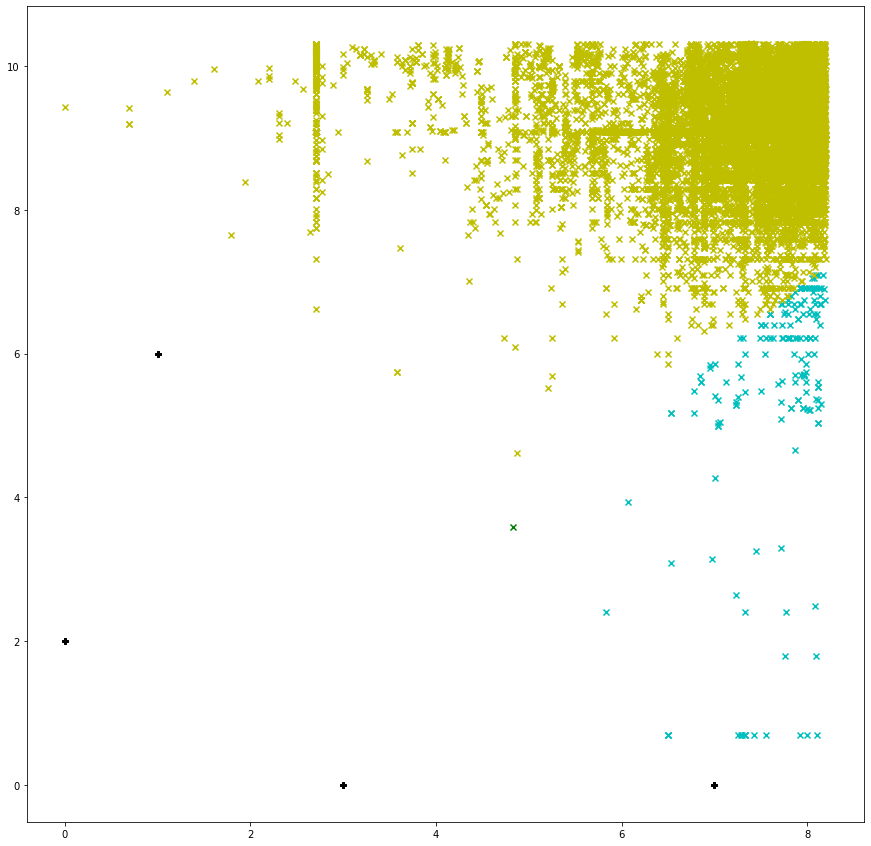

In [40]:
fig, ax = plt.subplots(figsize=(15,15))
colors = ['c','m','y','g','r']
i = 0
for cluster in clusters:  
  for point in cluster:
    ax.scatter(point[0],point[1], marker = 'x', c=colors[i])
  i+=1
i=0
for centroid in centroids:
  ax.scatter(centroid[0], centroid[1],marker='P',c='black')
  i+=1
plt.show()

In [41]:
model = df['model'].values
price = df['price'].values
data_and_clusters = pd.DataFrame(zip(model,price,y_pred),columns=['model','price','cluster'])
data_and_clusters

,model,price,cluster
0,7.545390,9.792556,2
1,7.330405,9.082052,2
2,7.330405,9.082052,2
3,7.330405,9.546813,2
4,7.964503,9.581973,2
...,...,...,...
18129,7.758333,7.696667,2
18130,8.164226,10.126631,2
18131,7.950502,9.403272,2
18132,7.559038,9.082052,2


##Evaluation: using elbow method

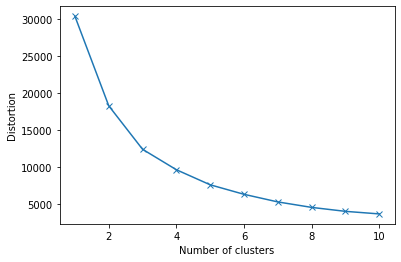

In [42]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random').fit(df)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='x')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()